## EDA and Exploration based on the following Kaggle Notebook
https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr/notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

# 2. Data Preparation
### 2.1 Check for NULLs/Duplicates

In [4]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1st DUPLICATE count:	1
2nd DUPLICATE count:	0


### 2.2 Feature Engineering
Rename columns (attributes) for better readability.

| Original Attribute Name | New Attribute Name   |  Description |
| :-- | :--  | :--- |
|**age**|age|age of patient
|**sex**|sex|sex of patient:  0 = female; 1 = male
|**cp**|chest_pain_type|chest pain type (4 values)
|**trestbps**|resting_blood_pressure|resting blood pressure
|**chol**|cholestoral|serum cholestoral in mg/dl
|**fbs**|fasting_blood_sugar|fasting blood sugar > 120 mg/dl
|**restecg**|resting_electrocardiographic|resting electrocardiographic results (values 0,1,2)
|**thalach**|maximum_heart_rate|maximum heart rate achieved
|**exang**|exercise_induced_angina|exercise induced angina
|**oldpeak**|ST_depression|oldpeak = ST depression induced by exercise relative to rest
|**slope**|slope_peak_exercise_ST|slope of the peak exercise ST segment
|**ca**|number_of_major_vessels|number of major vessels (0-3) colored by flourosopy
|**thal**|thal|thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [5]:
# renaming to understandable columns
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


In [6]:
# renaming to readable values
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


# 3. Understanding the Data
### 3.1 Data Types

In [7]:
print(df.info())         #  dataset size and types
print('\nData Shape:  {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    int64  
 1   sex                           302 non-null    object 
 2   chest_pain_type               302 non-null    object 
 3   resting_blood_pressure        302 non-null    int64  
 4   cholestoral                   302 non-null    int64  
 5   fasting_blood_sugar           302 non-null    object 
 6   resting_electrocardiographic  302 non-null    object 
 7   maximum_heart_rate            302 non-null    int64  
 8   exercise_induced_angina       302 non-null    object 
 9   ST_depression                 302 non-null    float64
 10  slope_peak_exercise_ST        302 non-null    object 
 11  number_of_major_vessels       302 non-null    int64  
 12  thal                          302 non-null    object 
 13  targe

### 3.2 Statistical Summary

In [8]:
df.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [9]:
df.describe(include=['O'])

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [29]:
df.target.mean()

0.543046357615894

In [28]:
df[df['sex_female']==1].target.mean()

0.75

In [30]:
df[df['sex_female']==0].target.mean()

0.44660194174757284

### 3.3 Types of Data
Separate out the Categoral and Numeric Data

In [10]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


# 4. Exploratory Data Analysis
### 4.1 Plots - Categorical Data

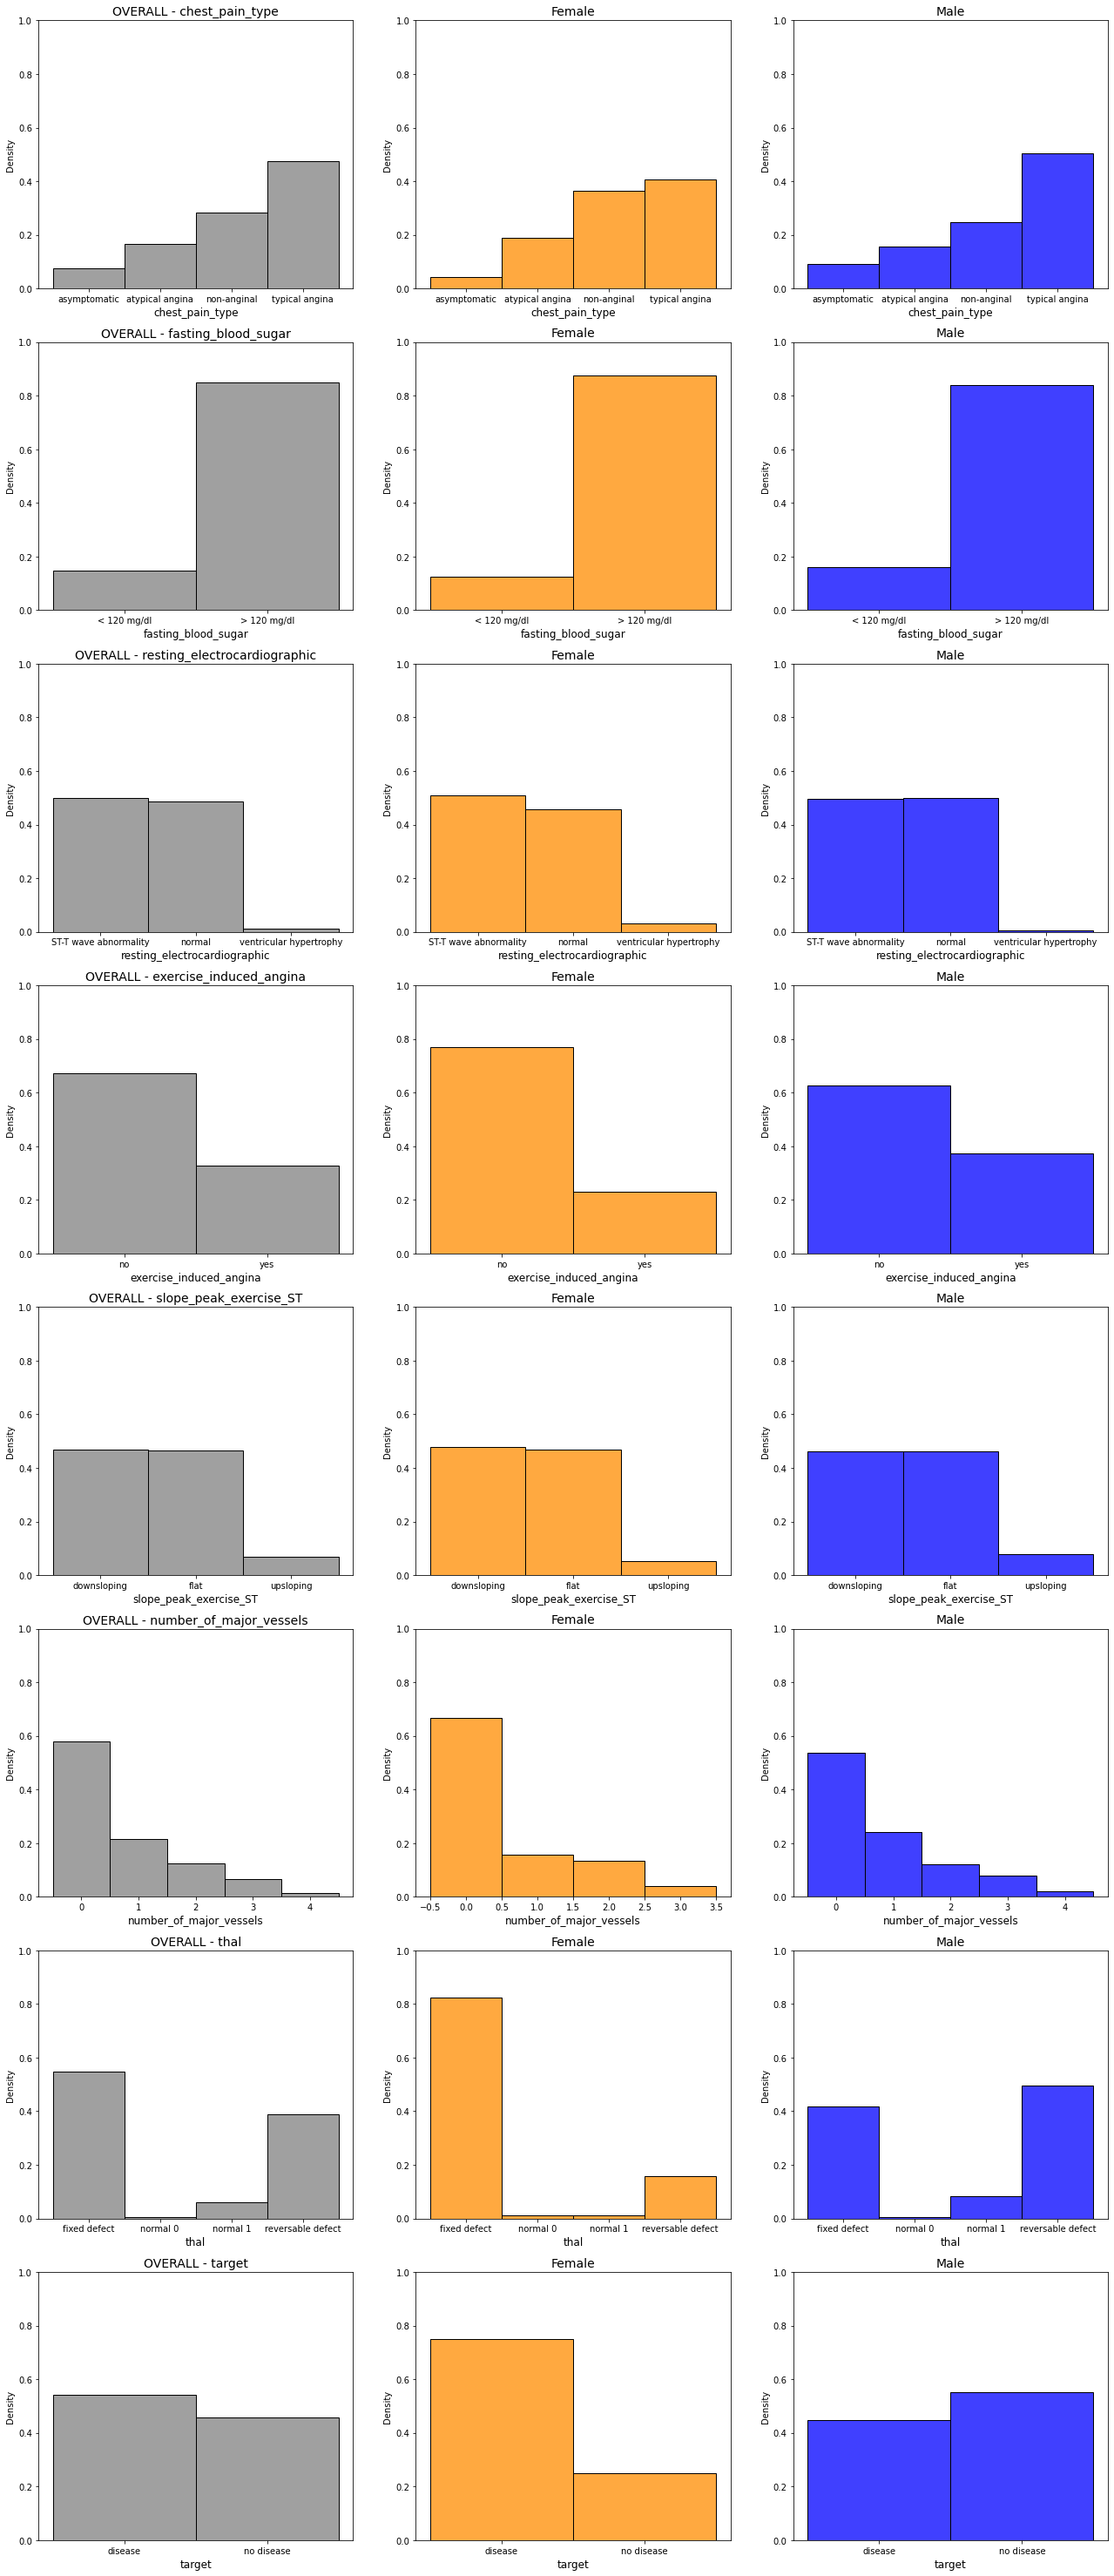

In [11]:
maleCAT    = df[(df['sex'] == 'male')]
femaleCAT = df[(df['sex'] == 'female')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, female, male
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(22,60))

for i in colCAT:
    if(i != 'sex'):
        df = df.sort_values(by=i)
        maleCAT = maleCAT.sort_values(by=i)
        femaleCAT = femaleCAT.sort_values(by=i)
        # overall
        fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
        plt.title('OVERALL - {}'.format(i), fontsize=14)
        plt.xlabel(i, fontsize=12)
        sns.histplot(data=df, x=df[i], stat='density', color='gray', discrete=True).set(ylim=(0, 1))
        #sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.sex)
        subPlotNum = subPlotNum + 1
        # no_diseaseCAT
        fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
        plt.title('Female', fontsize=14)
        plt.xlabel(i, fontsize=12)
        sns.histplot(data=femaleCAT, x=femaleCAT[i],stat='density',color='darkorange', discrete=True).set(ylim=(0, 1))
        subPlotNum = subPlotNum + 1
        # diseaseCAT
        fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
        plt.title('Male', fontsize=14)
        plt.xlabel(i, fontsize=12)
        #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
        sns.histplot(data=maleCAT, x=maleCAT[i],stat='density',color='blue', discrete=True).set(ylim=(0, 1))
        subPlotNum = subPlotNum + 1
plt.show()

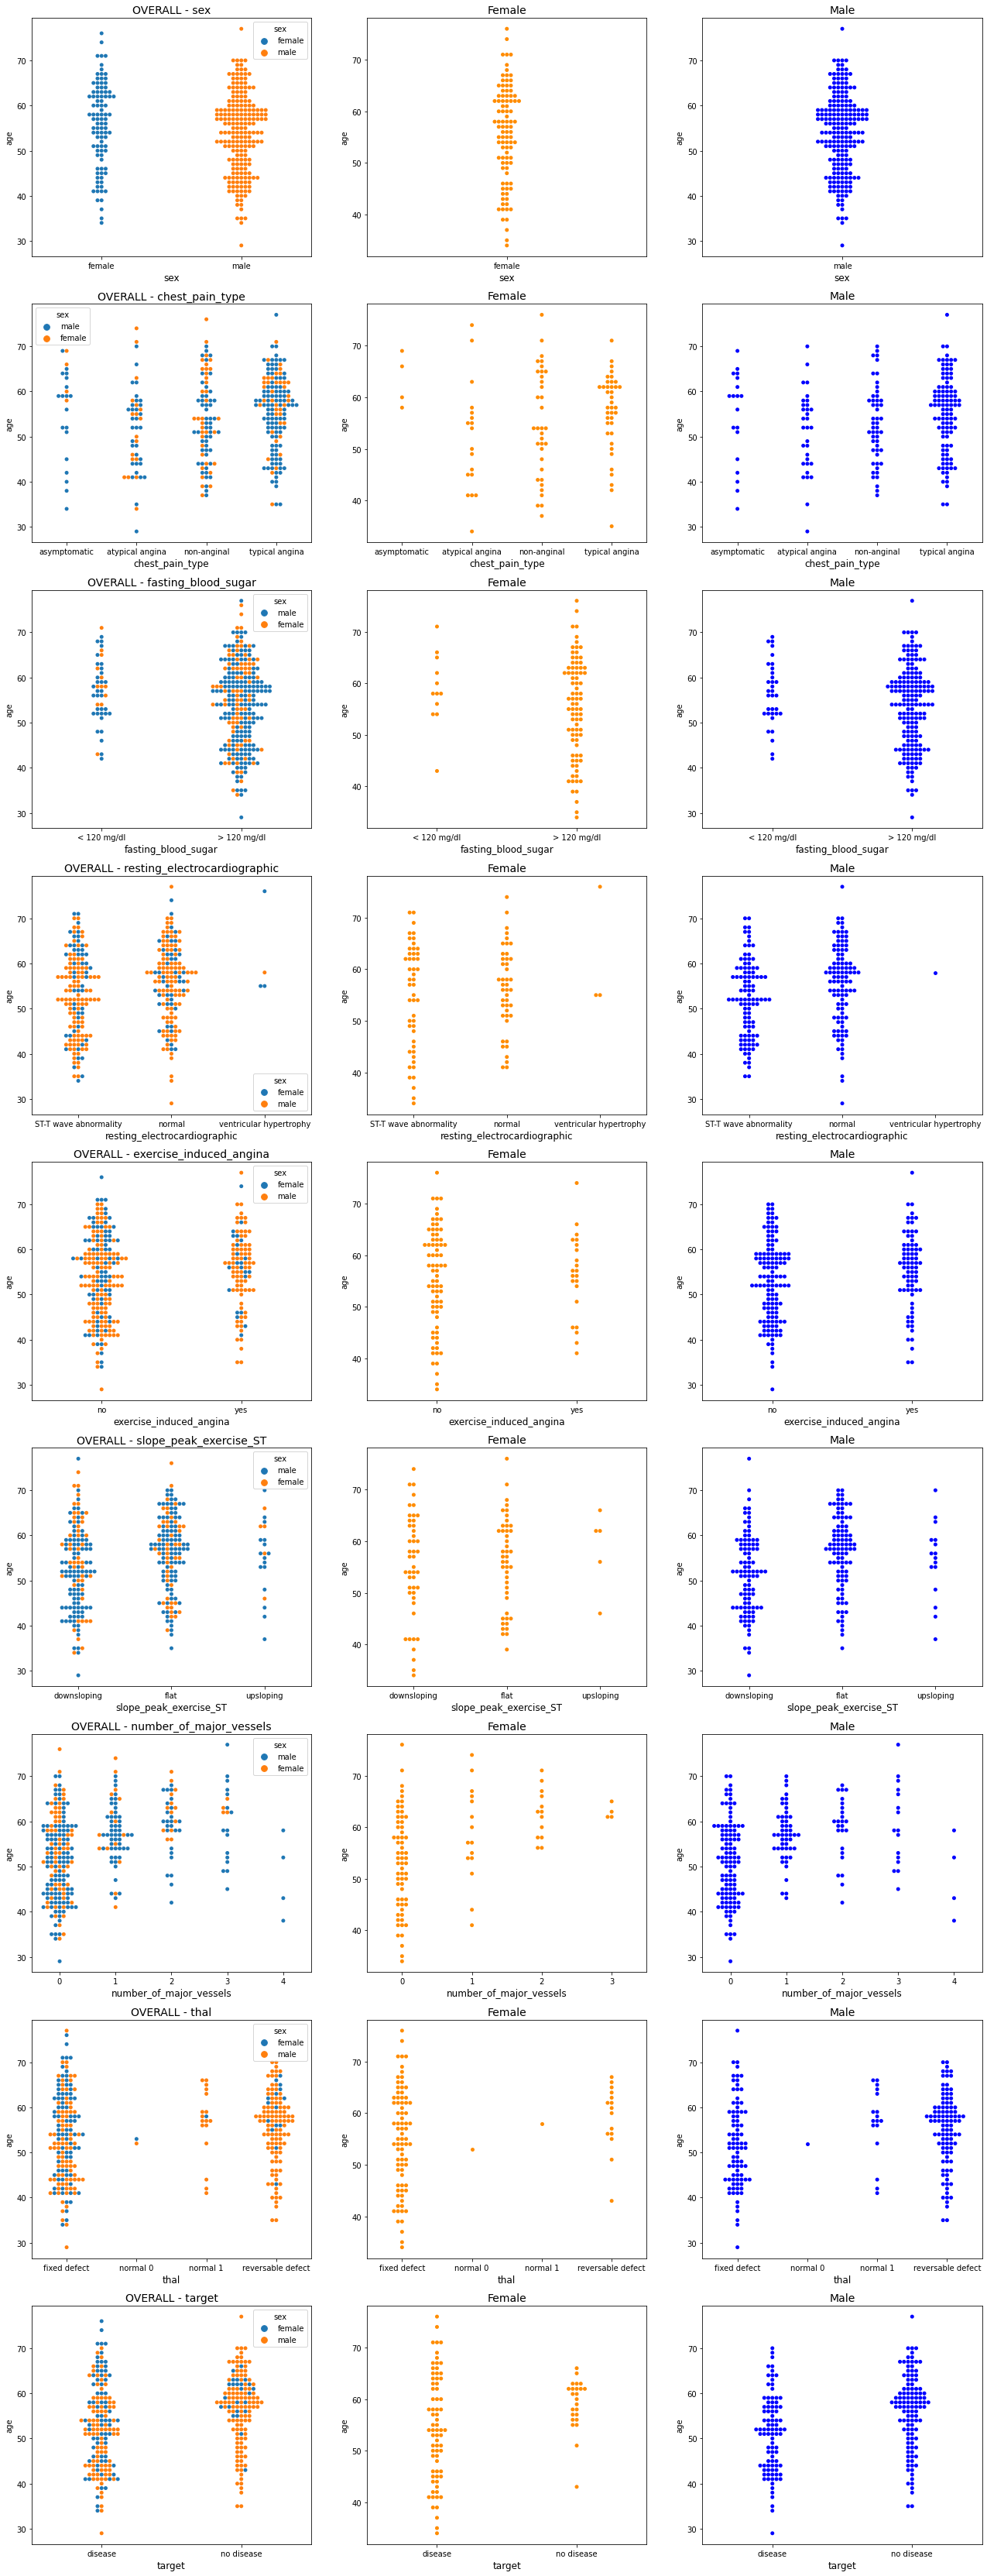

In [12]:
maleCAT    = df[(df['sex'] == 'male')]
femaleCAT = df[(df['sex'] == 'female')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, female, male
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(22,60))

for i in colCAT:
    df = df.sort_values(by=i)
    maleCAT = maleCAT.sort_values(by=i)
    femaleCAT = femaleCAT.sort_values(by=i)
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.sex)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('Female', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=femaleCAT, x=femaleCAT[i],y=femaleCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('Male', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=maleCAT, x=maleCAT[i],y=maleCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()

##### Observations:

- **Age**: Male population is more concentrated in the 50-60 age group while Female population is more scattered across age groups
- **chest_pain_type**: Males have a higher share of asymptomatic angina than females.
- **fasting_blood_sugar:** Generally see similar trends between males and females.
- **resting_electrocardiographic:** Generally similar trends between males and females
- **exercise_induced_angina:** Males generally have a higher ratio of execrise induced angina than females.
- **slope_peak_exercise_ST:** Similar trends observed between males and females across ages.
- **number_of_major_vessels:** Males generally have a higher number of vessels colored by fluroscopy
- **thal:** Males have a much larger share of reversible defects than females do.
- **target:** data has more male population with no heart disease than female; however, the population of patients with heart disease is almost the same, with the female population spread over a longer age range.

### 4.2 Plots - Numerical Data

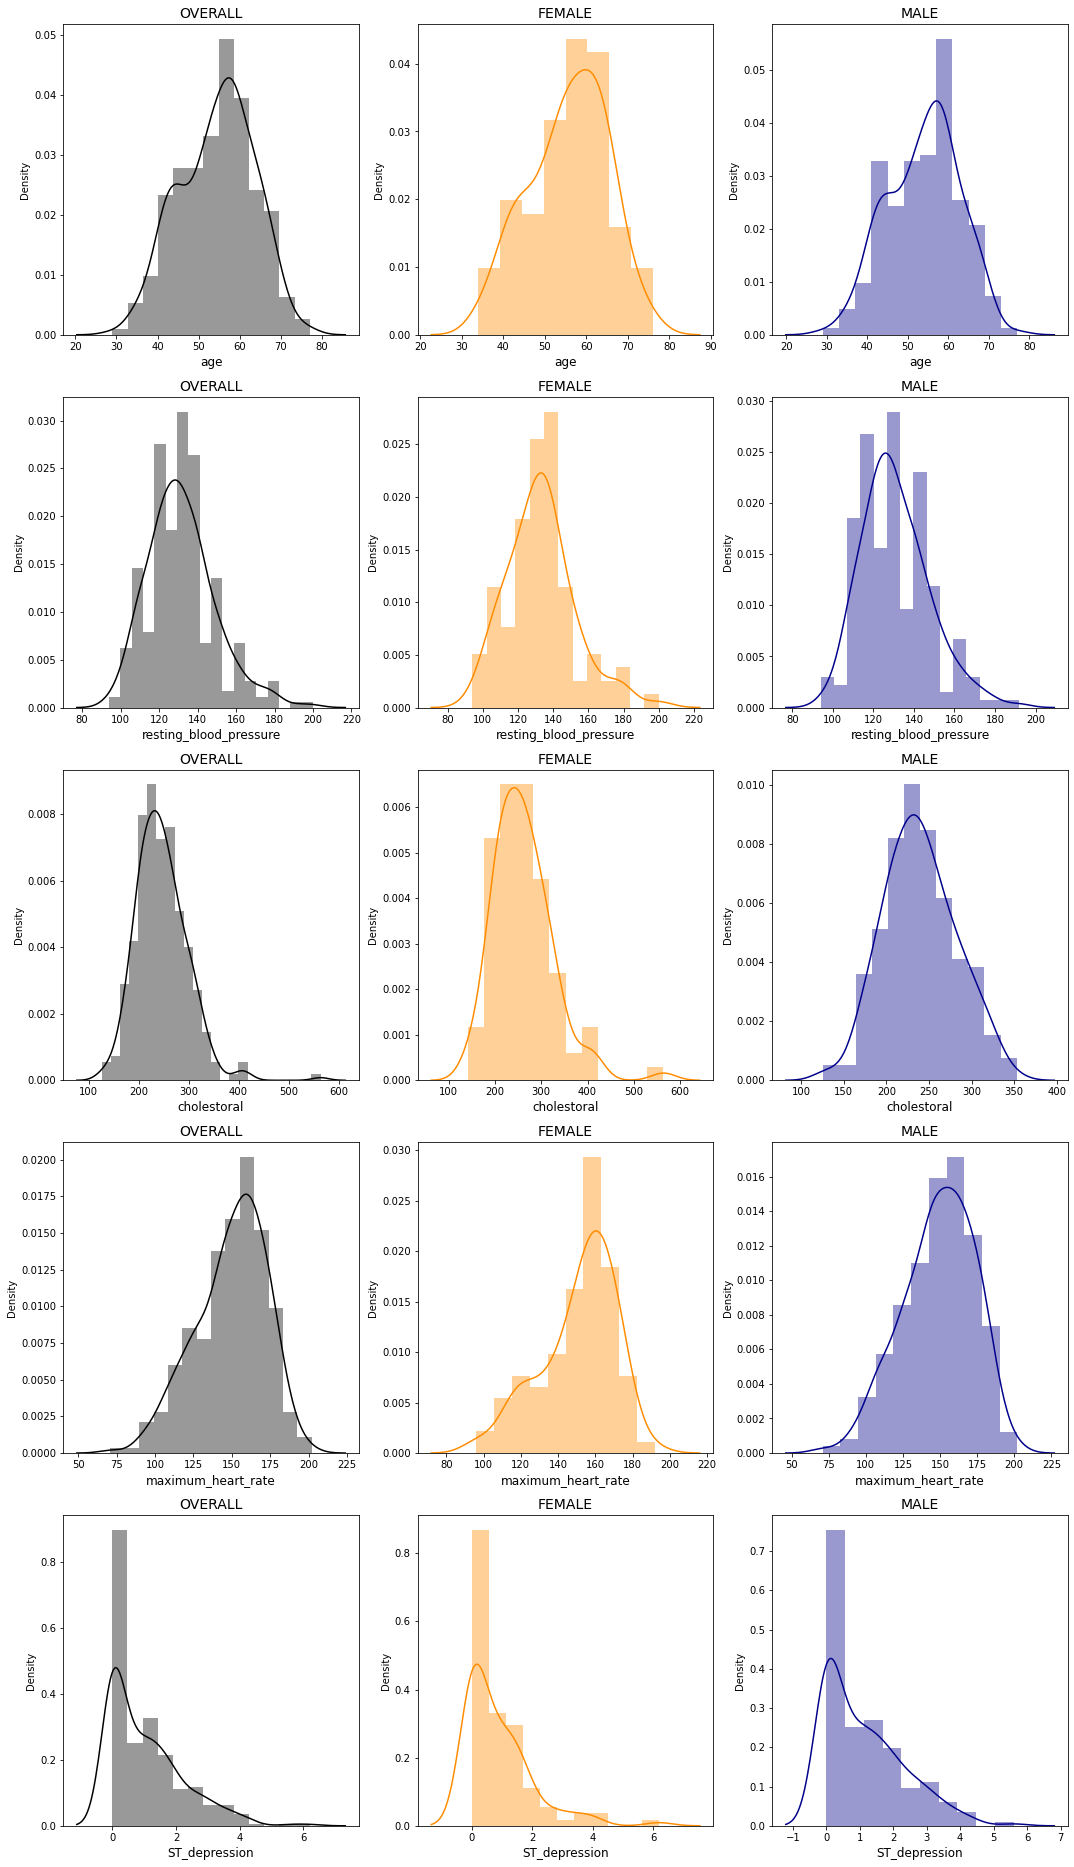

In [13]:
#  assign NUM dataframe for "no disease" and "disease"
maleNUM    = df[(df['sex'] == 'male')]
femaleNUM = df[(df['sex'] == 'female')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)  
subNumOfCol = 3     # three columns: overall, female, male
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(18,40))

for i in dataNUM.columns.drop(['target']):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('FEMALE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(femaleNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('MALE', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(maleNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

In [14]:
maleNUM.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,53.834951,130.912621,239.601942,148.844660,1.120874,0.796117
std,8.836838,16.691524,42.649757,24.131048,1.174901,1.053303
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.000000,120.000000,208.750000,132.000000,0.000000,0.000000
50%,54.500000,130.000000,235.000000,150.500000,0.800000,0.000000
75%,59.750000,140.000000,268.500000,167.500000,1.800000,1.000000
max,77.000000,192.000000,353.000000,202.000000,5.600000,4.000000


In [15]:
femaleNUM.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,55.677083,133.083333,261.302083,151.125000,0.876042,0.552083
std,9.409396,19.311119,65.088946,20.047969,1.119844,0.881026
min,34.000000,94.000000,141.000000,96.000000,0.000000,0.000000
25%,49.750000,120.000000,214.750000,141.250000,0.000000,0.000000
50%,57.000000,131.000000,253.000000,157.000000,0.600000,0.000000
75%,63.000000,140.000000,296.750000,165.000000,1.400000,1.000000
max,76.000000,200.000000,564.000000,192.000000,6.200000,3.000000


##### Observations:
- Cholesterol and maximum heart rate for females skews higher than males. On the other hand, females have lower ST_depression on average than males driven by the male distribution having a larger tail. 


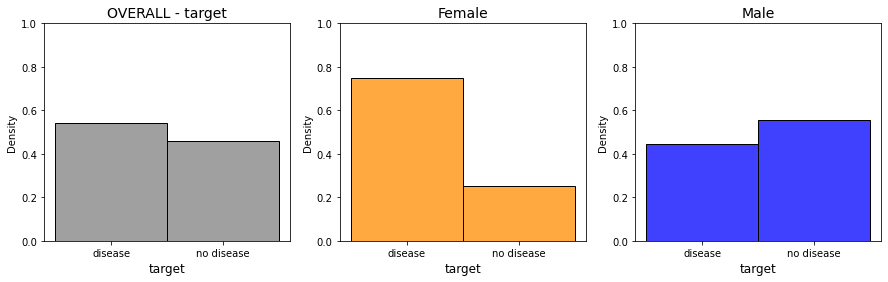

In [17]:
#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = 1
subNumOfCol = 3     # three columns: overall, female, male
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(15,4))

for i in ['target']:
    df = df.sort_values(by=i)
    maleCAT = maleCAT.sort_values(by=i)
    femaleCAT = femaleCAT.sort_values(by=i)
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.histplot(data=df, x=df[i], stat='density', color='gray', discrete=True).set(ylim=(0, 1))
    #sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.sex)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('Female', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.histplot(data=femaleCAT, x=femaleCAT[i],stat='density',color='darkorange', discrete=True).set(ylim=(0, 1))
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('Male', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.histplot(data=maleCAT, x=maleCAT[i],stat='density',color='blue', discrete=True).set(ylim=(0, 1))
    subPlotNum = subPlotNum + 1
plt.show()

### 4.3. Correlation Matrix

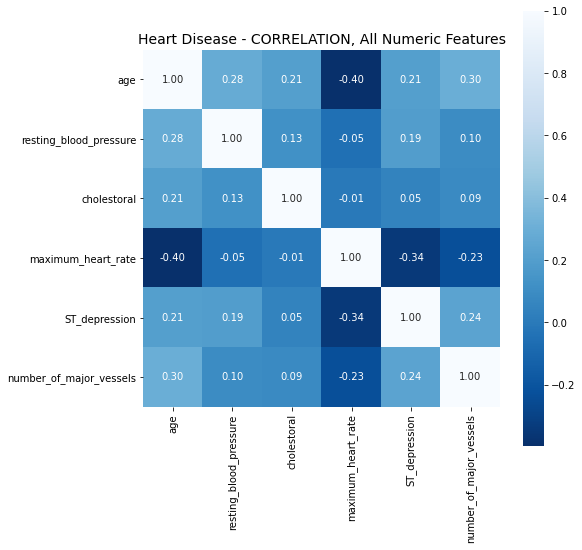

In [18]:
plt.figure(figsize=(8,8))
plt.title('Heart Disease - CORRELATION, All Numeric Features', fontsize=14)
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
plt.show()

In [19]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
94,1,0,0,1,0,0,0,1,1,0,...,1,0,0,0,45,112,160,138,0.0,1
29,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,53,130,197,152,1.2,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
133,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,41,110,235,153,0.0,1
80,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,41,112,250,179,0.0,1


### 5.2 Normalize Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.16981132, 0.07762557, 0.51145038, 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.5       , 0.33962264, 0.16210046, 0.61832061, 0.19354839,
        1.        ]])

In [21]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
94,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.333333,0.169811,0.077626,0.511450,0.000000,1.0
29,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.500000,0.339623,0.162100,0.618321,0.193548,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
133,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.250000,0.150943,0.248858,0.625954,0.000000,1.0
80,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.250000,0.169811,0.283105,0.824427,0.000000,1.0


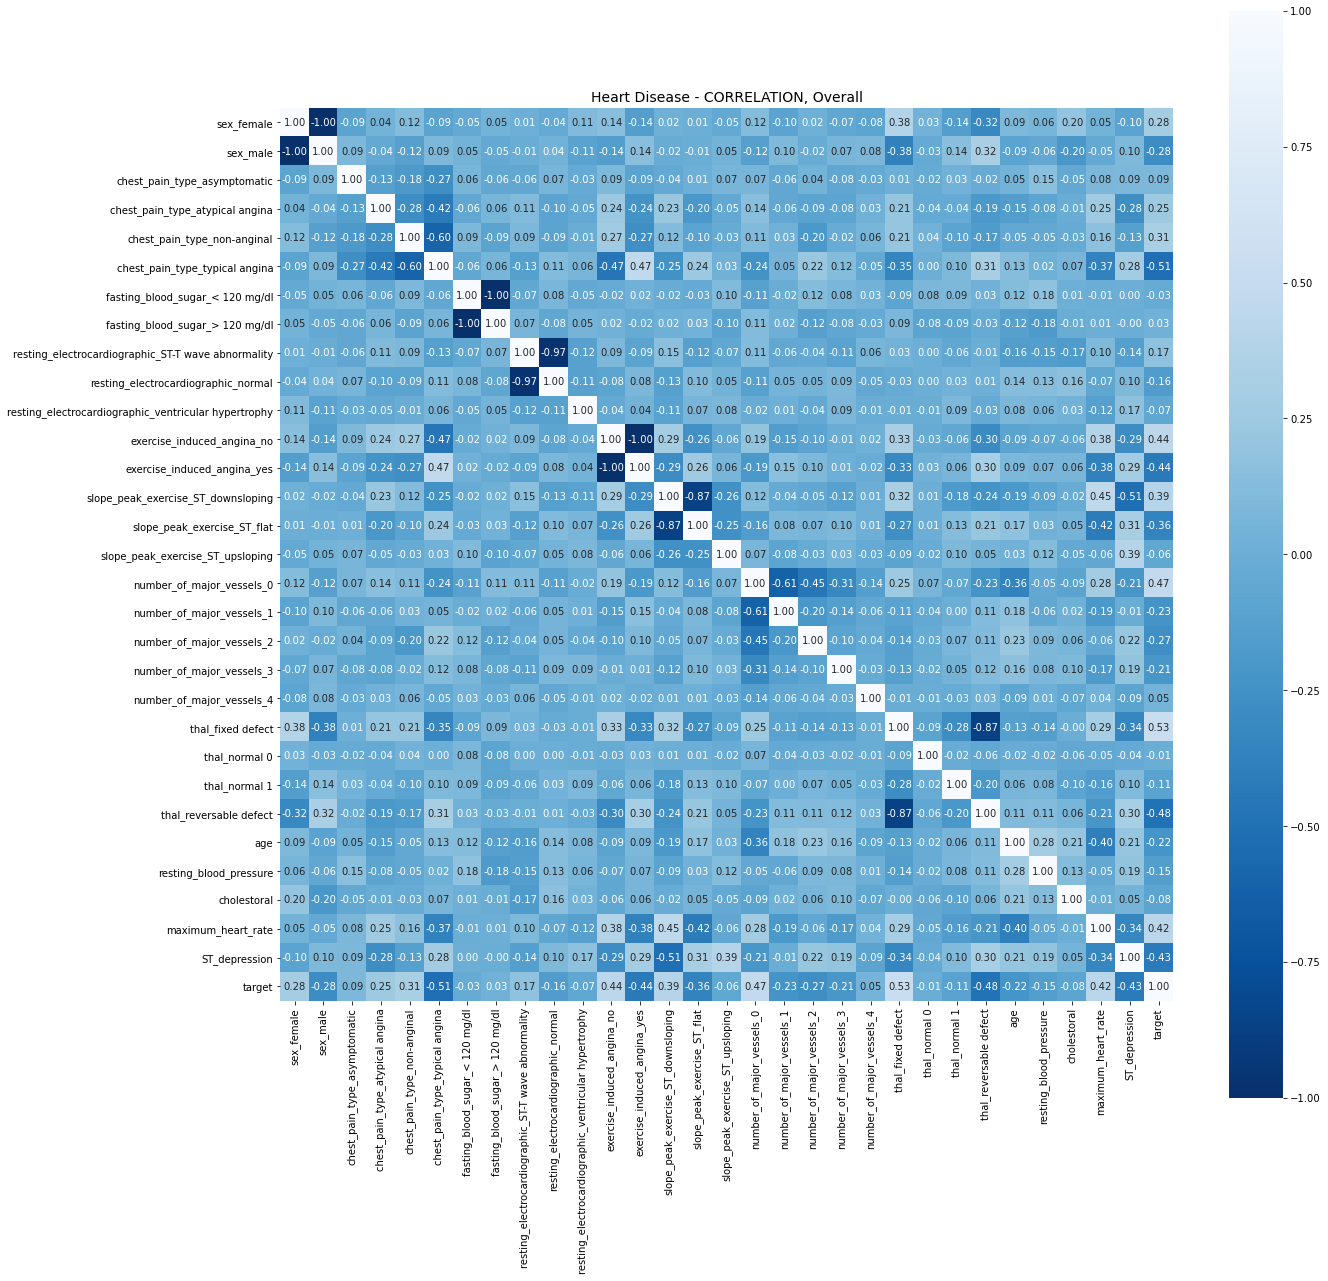

In [22]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [23]:
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

,target
thal_fixed defect,0.526030
number_of_major_vessels_0,0.470849
exercise_induced_angina_no,0.435601
maximum_heart_rate,0.419955
slope_peak_exercise_ST_downsloping,0.392121
chest_pain_type_non-anginal,0.313696
sex_female,0.283609
chest_pain_type_atypical angina,0.247649
resting_electrocardiographic_ST-T wave abnormality,0.172827
chest_pain_type_asymptomatic,0.087959


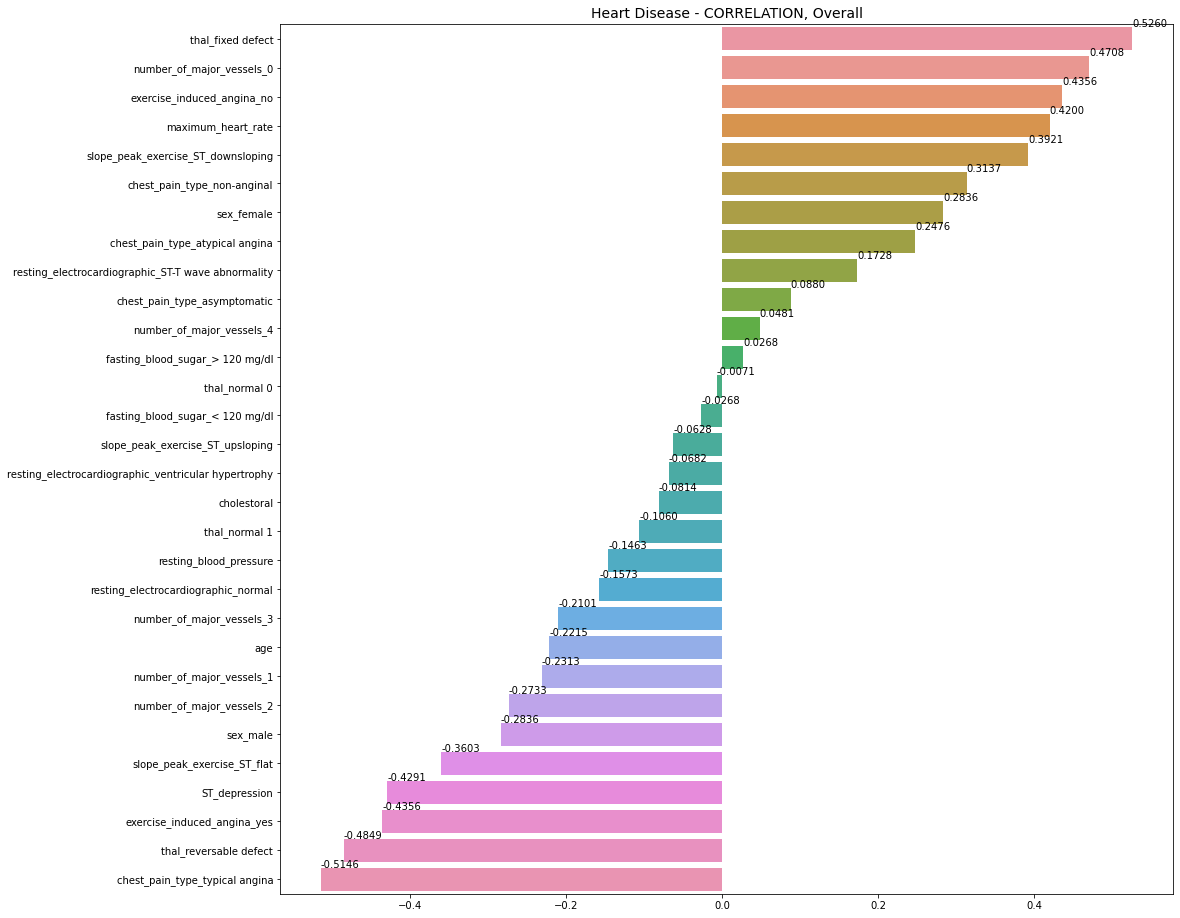

In [24]:
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

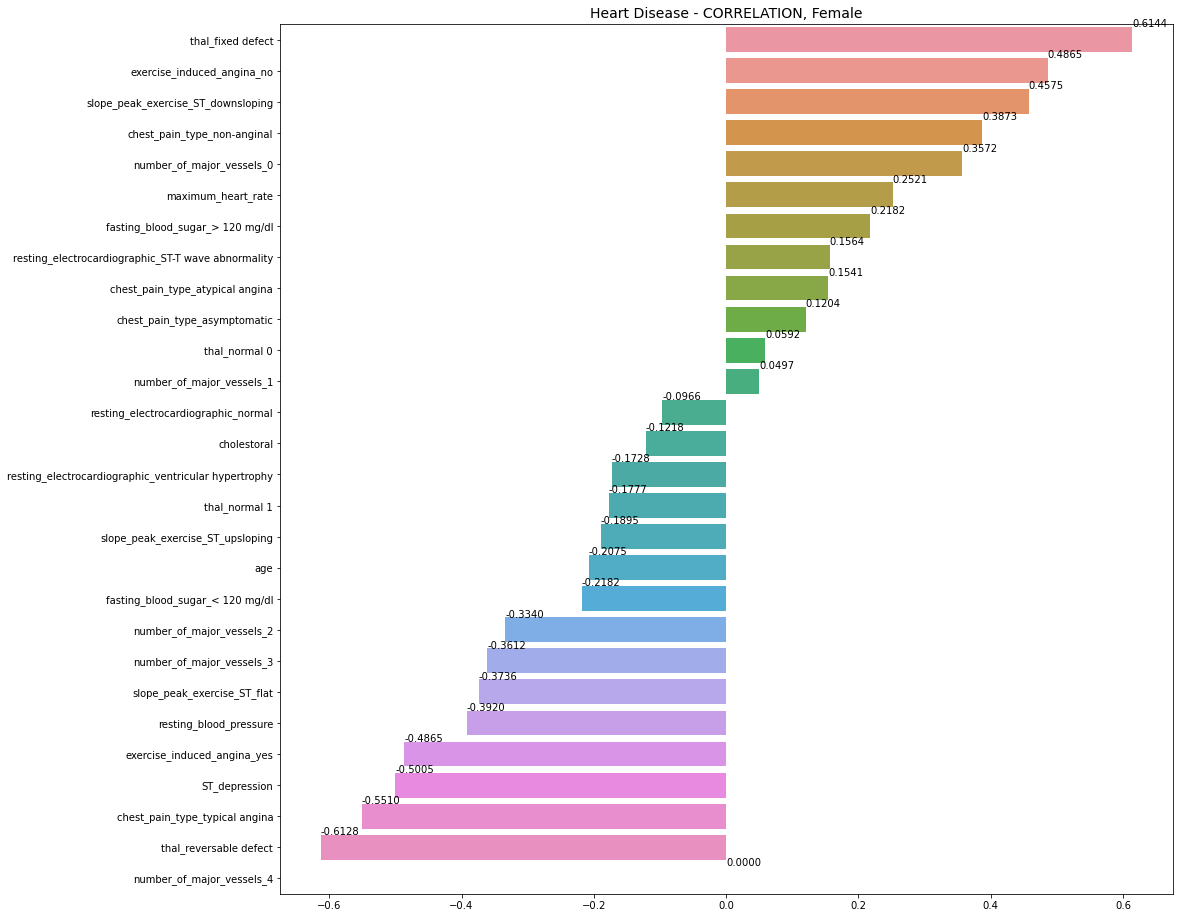

In [25]:
# for females
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

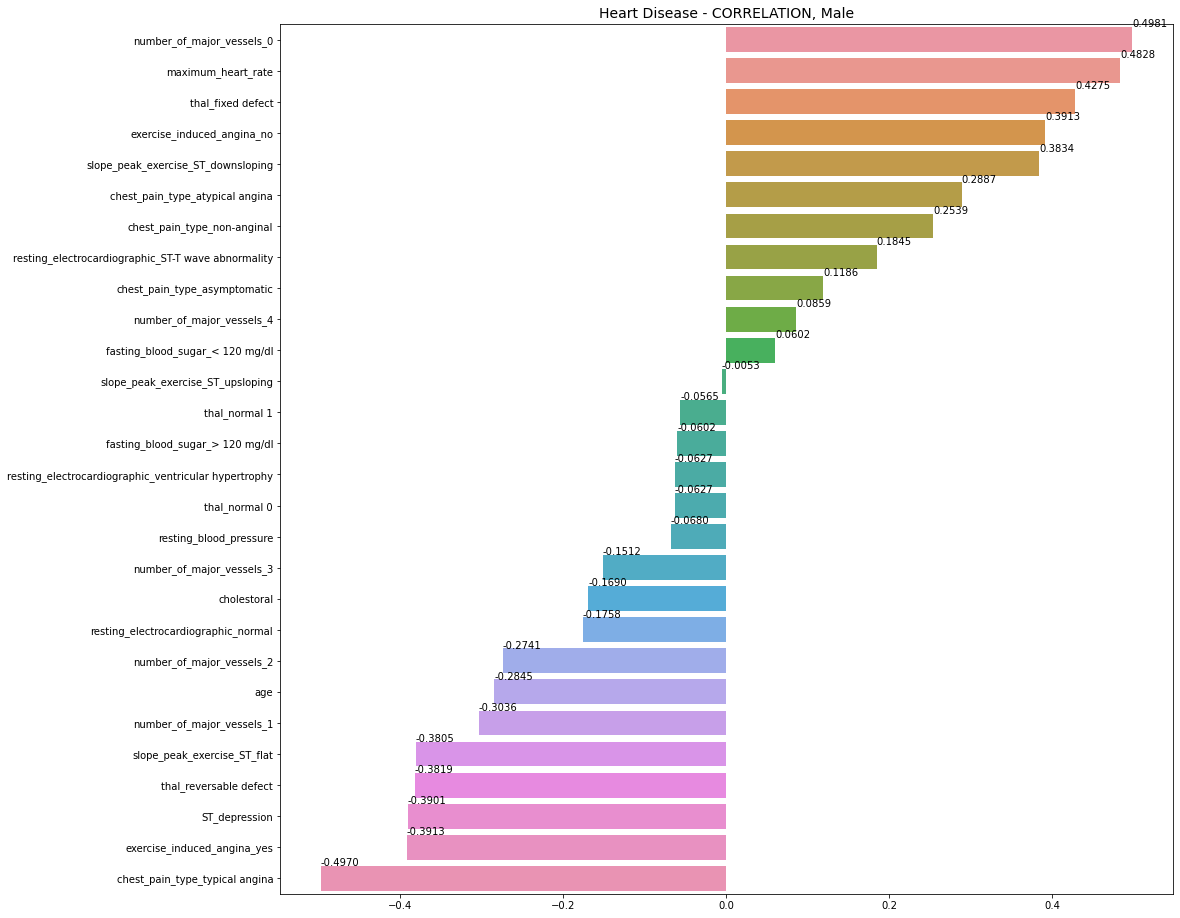

In [26]:
# for males
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()


##### Observations:
- **female:** thal fixed and reversable defect are major factors in heart disease, as well as angina type chest paints and ST_despression.
- **male:** number of vessels, angina type chest pains and maximum_heart_rate are major facotrs in heart disease.